In [1]:
# load data from tsp file
import numpy as np

tsp_data = np.loadtxt('..\TSPFiles\p01.15.291.tsp')
print(tsp_data.shape)
print(tsp_data)

(15, 15)
[[ 0. 29. 82. 46. 68. 52. 72. 42. 51. 55. 29. 74. 23. 72. 46.]
 [29.  0. 55. 46. 42. 43. 43. 23. 23. 31. 41. 51. 11. 52. 21.]
 [82. 55.  0. 68. 46. 55. 23. 43. 41. 29. 79. 21. 64. 31. 51.]
 [46. 46. 68.  0. 82. 15. 72. 31. 62. 42. 21. 51. 51. 43. 64.]
 [68. 42. 46. 82.  0. 74. 23. 52. 21. 46. 82. 58. 46. 65. 23.]
 [52. 43. 55. 15. 74.  0. 61. 23. 55. 31. 33. 37. 51. 29. 59.]
 [72. 43. 23. 72. 23. 61.  0. 42. 23. 31. 77. 37. 51. 46. 33.]
 [42. 23. 43. 31. 52. 23. 42.  0. 33. 15. 37. 33. 33. 31. 37.]
 [51. 23. 41. 62. 21. 55. 23. 33.  0. 29. 62. 46. 29. 51. 11.]
 [55. 31. 29. 42. 46. 31. 31. 15. 29.  0. 51. 21. 41. 23. 37.]
 [29. 41. 79. 21. 82. 33. 77. 37. 62. 51.  0. 65. 42. 59. 61.]
 [74. 51. 21. 51. 58. 37. 37. 33. 46. 21. 65.  0. 61. 11. 55.]
 [23. 11. 64. 51. 46. 51. 51. 33. 29. 41. 42. 61.  0. 62. 23.]
 [72. 52. 31. 43. 65. 29. 46. 31. 51. 23. 59. 11. 62.  0. 59.]
 [46. 21. 51. 64. 23. 59. 33. 37. 11. 37. 61. 55. 23. 59.  0.]]


<>:4: SyntaxWarning: invalid escape sequence '\T'
<>:4: SyntaxWarning: invalid escape sequence '\T'
C:\Users\nolan\AppData\Local\Temp\ipykernel_26176\566037630.py:4: SyntaxWarning: invalid escape sequence '\T'
  tsp_data = np.loadtxt('..\TSPFiles\p01.15.291.tsp')


In [2]:
import math

# generate a random solution with a given length
def initial_solution(length):
    s = np.random.permutation(length)  # Generate a random permutation of numbers from 0 to length-1
    return s
    
# measure the quality of the solution s
def objectivefunction(s):
    cost = 0
    for i in range(len(s) - 1):
        cost += tsp_data[s[i], s[i + 1]]  # Add the distance between consecutive cities
    cost += tsp_data[s[-1], s[0]]  # Add the distance from the last city back to the first city
    return cost
            
# generate all the neighbors of the solution s
def generate_all_neighbors(s):
    neighbors_list = []
    for i in range(len(s)):
        for j in range(i + 1, len(s)):
            neighbor = np.copy(s)  # Create a copy of the current solution
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i]  # Swap two cities to create a neighbor
            neighbors_list.append(neighbor)  # Add the neighbor to the list
    return neighbors_list

# get the best neighbor and return it with its quality
def get_best_neighbor(s):
    neighbors = generate_all_neighbors(s)  # Generate all neighbors of the current solution
    best_neighbor = None
    best_cost = float('inf')  # Initialize the best cost to infinity
    for neighbor in neighbors:
        cost = objectivefunction(neighbor)  # Calculate the cost of the neighbor
        if cost < best_cost:  # If the neighbor's cost is better, update the best cost and best neighbor
            best_neighbor = neighbor
            best_cost = cost
    return best_neighbor, best_cost  # Return the best neighbor and its cost


In [3]:
import matplotlib.pyplot as plt

costs_hist = []  # Initialize an empty list to store the history of costs

# Generate a random initial solution and calculate its cost
s = initial_solution(tsp_data.shape[0]) 
cost_s = objectivefunction(s)

# Save the initial cost to the history
costs_hist.append(cost_s)

# Consider the initial solution as the best solution for now
best_s = np.copy(s)  # Create a hard copy of the initial solution
best_cost = cost_s  # Set the initial cost as the best cost

# Start the optimization loop
while True:
    # Get the best neighbor of the current solution and its cost
    neighbor, cost_neighbor = get_best_neighbor(np.copy(s))
    
    # If the neighbor's cost is better, update the current solution
    if cost_neighbor < cost_s:
        s = np.copy(neighbor)  # Update the current solution to the neighbor
        cost_s = cost_neighbor  # Update the current cost to the neighbor's cost
        best_s = s  # Update the best solution to the current solution
        best_cost = cost_s  # Update the best cost to the current cost
        costs_hist.append(cost_s)  # Save the current cost to the history
    else:
        break  # If no better neighbor is found, exit the loop

# Print the best solution and its cost in a more readable format
print('Best solution:', best_s)
print('Best cost:', best_cost)

Best solution: [ 6  2 11 13  9  7  5  3 10  0 12  1 14  8  4]
Best cost: 291.0


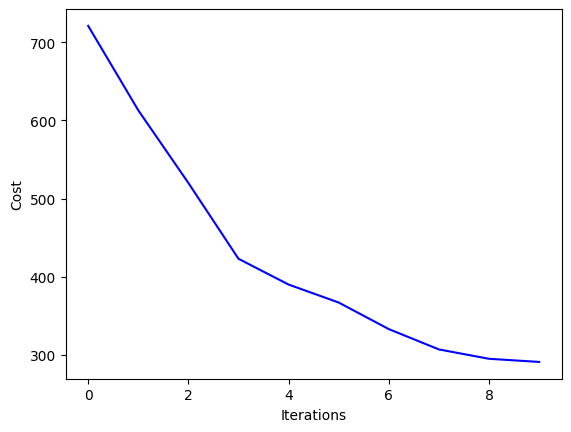

In [4]:
import matplotlib.pyplot as plt  # Import the matplotlib.pyplot module for plotting

# Plot the history of costs
plt.plot(costs_hist, 'b')  # Plot the costs history with blue color
plt.xlabel('Iterations')  # Set the label for the x-axis as 'Iterations'
plt.ylabel('Cost')  # Set the label for the y-axis as 'Cost'
plt.show()  # Display the plot

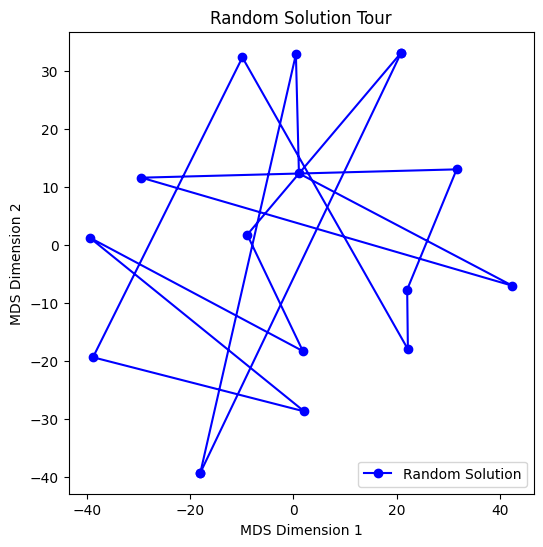

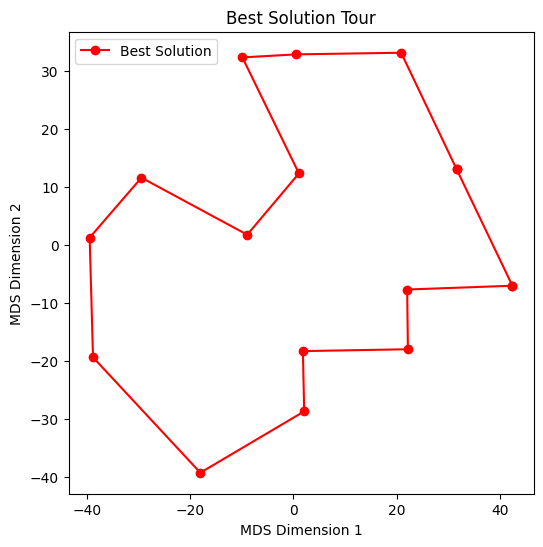

In [5]:
# Convert distance matrix between cities into coordinates of cities using MDS (Multidimensional Scaling)
from sklearn import manifold  # Import the manifold module from sklearn for MDS

length = tsp_data.shape[0]  # Get the number of cities from the shape of tsp_data
mds_model = manifold.MDS(n_components=2, random_state=length, dissimilarity='precomputed')  # Create an MDS model with 2 components and precomputed dissimilarity
mds_fit = mds_model.fit(tsp_data)  # Fit the MDS model to the tsp_data
mds_coords = mds_model.fit_transform(tsp_data)  # Transform the distance matrix into 2D coordinates

# Plot a random solution over cities
s = initial_solution(length)  # Generate a random initial solution
fig, ax = plt.subplots(1, 1, figsize=(6, 6))  # Create a new figure and axis for plotting
ax.plot(mds_coords[s, 0], mds_coords[s, 1], 'b-o', label='Random Solution')  # Plot the random solution on the 2D coordinates
ax.plot([mds_coords[s[0], 0], mds_coords[s[-1], 0]], [mds_coords[s[0], 1], mds_coords[s[-1], 1]], 'b-o')  # Connect the first and last cities to complete the tour
ax.set_title('Random Solution Tour')  # Set the title of the plot
ax.set_xlabel('MDS Dimension 1')  # Set the label for the x-axis
ax.set_ylabel('MDS Dimension 2')  # Set the label for the y-axis
ax.legend()  # Add a legend to the plot
plt.show()  # Display the plot

# Plot the best solution over cities
fig, ax = plt.subplots(1, 1, figsize=(6, 6))  # Create another new figure and axis for plotting
ax.plot(mds_coords[best_s, 0], mds_coords[best_s, 1], 'r-o', label='Best Solution')  # Plot the best solution on the 2D coordinates
ax.plot([mds_coords[best_s[0], 0], mds_coords[best_s[-1], 0]], [mds_coords[best_s[0], 1], mds_coords[best_s[-1], 1]], 'r-o')  # Connect the first and last cities to complete the tour
ax.set_title('Best Solution Tour')  # Set the title of the plot
ax.set_xlabel('MDS Dimension 1')  # Set the label for the x-axis
ax.set_ylabel('MDS Dimension 2')  # Set the label for the y-axis
ax.legend()  # Add a legend to the plot
plt.show()  # Display the plot
